# **Is Shot Quality Consistent over Time and Across Players?**

#### Usage of analytics in football has seen great strides over the past decade, with much of the progress seen as a result of the innovation that is expected goals. Expected goals (xG) provides a singular value which captures a snapshot of the quality of the chance when the ball is struck towards goal by showing the probability of scoring from that position. These models take into account ball positioning, type of shot, positioning of defenders and more factors (particularly the more advanced models produced by the likes of statsbomb) to quantify chances.

In [ ]:
# Imports
import pandas as pd
from bs4 import BeautifulSoup
import requests
import time
from selenium import webdriver

In [ ]:
# Getting Premier League Season Links
premier_league_match_links = []

for i in range(2019, 2024):
    premier_league_match_links.append(f'https://fbref.com/en/comps/9/{i}-{i+1}/schedule/{i}-{i+1}-Premier-League-Scores-and-Fixtures')

print(premier_league_match_links)

['https://fbref.com/en/comps/9/2019-2020/schedule/2019-2020-Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2020-2021/schedule/2020-2021-Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2021-2022/schedule/2021-2022-Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2022-2023/schedule/2022-2023-Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2023-2024/schedule/2023-2024-Premier-League-Scores-and-Fixtures']


In [ ]:
# Creating a function to get links to matches from the season scores and fixtures
def match_links_getter(url):
    driver = webdriver.Chrome()
    url_split = url.split('/')
    url_year = url_split[-1]
    url_season = url_year[0:9]
    print(url_season)
    driver.get(url)
    time.sleep(1)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    table = soup.find("table", attrs={"class": "stats_table sortable min_width now_sortable"})
    print(len(table))
    match_links = []

    if table:
        for row in table.find_all("tr"):  
            match_report_cell = row.find("td", {"data-stat": "match_report"})
            if match_report_cell: 
                link_tag = match_report_cell.find("a") 
                if link_tag and "href" in link_tag.attrs:
                    match_links.append("https://fbref.com" + link_tag["href"])
                else:
                    continue
    driver.quit()
    return match_links

In [ ]:
# Placing all the links in one list
all_links = []
for link in premier_league_match_links:
    all_links.append(match_links_getter(link))
print(all_links)

2019-2020
9
2020-2021
9
2021-2022
9
2022-2023
9
2023-2024
9
[['https://fbref.com/en/matches/928467bd/Liverpool-Norwich-City-August-9-2019-Premier-League', 'https://fbref.com/en/matches/71c8a43e/West-Ham-United-Manchester-City-August-10-2019-Premier-League', 'https://fbref.com/en/matches/d402cacd/Bournemouth-Sheffield-United-August-10-2019-Premier-League', 'https://fbref.com/en/matches/38111659/Watford-Brighton-and-Hove-Albion-August-10-2019-Premier-League', 'https://fbref.com/en/matches/a802f51e/Crystal-Palace-Everton-August-10-2019-Premier-League', 'https://fbref.com/en/matches/34b99058/Burnley-Southampton-August-10-2019-Premier-League', 'https://fbref.com/en/matches/404ee5d3/Tottenham-Hotspur-Aston-Villa-August-10-2019-Premier-League', 'https://fbref.com/en/matches/bf4afd61/Leicester-City-Wolverhampton-Wanderers-August-11-2019-Premier-League', 'https://fbref.com/en/matches/1405a610/Newcastle-United-Arsenal-August-11-2019-Premier-League', 'https://fbref.com/en/matches/d0583d0d/Manches

In [ ]:
# Putting all game links in one list
game_links_2019, game_links_2020, game_links_2021, game_links_2022, game_links_2023 = all_links[0], all_links[1], all_links[2], all_links[3], all_links[4]
print(game_links_2019)

['https://fbref.com/en/matches/928467bd/Liverpool-Norwich-City-August-9-2019-Premier-League', 'https://fbref.com/en/matches/71c8a43e/West-Ham-United-Manchester-City-August-10-2019-Premier-League', 'https://fbref.com/en/matches/d402cacd/Bournemouth-Sheffield-United-August-10-2019-Premier-League', 'https://fbref.com/en/matches/38111659/Watford-Brighton-and-Hove-Albion-August-10-2019-Premier-League', 'https://fbref.com/en/matches/a802f51e/Crystal-Palace-Everton-August-10-2019-Premier-League', 'https://fbref.com/en/matches/34b99058/Burnley-Southampton-August-10-2019-Premier-League', 'https://fbref.com/en/matches/404ee5d3/Tottenham-Hotspur-Aston-Villa-August-10-2019-Premier-League', 'https://fbref.com/en/matches/bf4afd61/Leicester-City-Wolverhampton-Wanderers-August-11-2019-Premier-League', 'https://fbref.com/en/matches/1405a610/Newcastle-United-Arsenal-August-11-2019-Premier-League', 'https://fbref.com/en/matches/d0583d0d/Manchester-United-Chelsea-August-11-2019-Premier-League', 'https://f

In [ ]:
# Creating a function to get all of the shot data from each match link
def shot_getter(shot_list):
    all_shots = []
    for i in shot_list:
        game_shots_df = pd.read_html(i, attrs={"id":"shots_all"})[0]
        game_shots_df.columns = ['_'.join(col).strip() for col in game_shots_df.columns.values]
        all_shots.append(game_shots_df)
        print(f"Completed {i}")
        time.sleep(6)

    all_shots_df = pd.concat(all_shots)
    return all_shots_df

In [ ]:
shots_2019_df = shot_getter(game_links_2019)
shots_2019_df.to_csv('shots_dfs/shots_2019.csv')
shots_2020_df = shot_getter(game_links_2020)
shots_2020_df.to_csv('shots_dfs/shots_2020.csv')
shots_2021_df = shot_getter(game_links_2021)
shots_2021_df.to_csv('shots_dfs/shots_2021.csv')
shots_2022_df = shot_getter(game_links_2022)
shots_2022_df.to_csv('shots_dfs/shots_2022.csv')
shots_2023_df = shot_getter(game_links_2023)
shots_2023_df.to_csv('shots_dfs/shots_2023.csv')

Completed https://fbref.com/en/matches/928467bd/Liverpool-Norwich-City-August-9-2019-Premier-League
Completed https://fbref.com/en/matches/71c8a43e/West-Ham-United-Manchester-City-August-10-2019-Premier-League
Completed https://fbref.com/en/matches/d402cacd/Bournemouth-Sheffield-United-August-10-2019-Premier-League
Completed https://fbref.com/en/matches/38111659/Watford-Brighton-and-Hove-Albion-August-10-2019-Premier-League
Completed https://fbref.com/en/matches/a802f51e/Crystal-Palace-Everton-August-10-2019-Premier-League
Completed https://fbref.com/en/matches/34b99058/Burnley-Southampton-August-10-2019-Premier-League
Completed https://fbref.com/en/matches/404ee5d3/Tottenham-Hotspur-Aston-Villa-August-10-2019-Premier-League
Completed https://fbref.com/en/matches/bf4afd61/Leicester-City-Wolverhampton-Wanderers-August-11-2019-Premier-League
Completed https://fbref.com/en/matches/1405a610/Newcastle-United-Arsenal-August-11-2019-Premier-League
Completed https://fbref.com/en/matches/d0583d

In [4]:
shots_2019_df = pd.read_csv('shots_dfs/shots_2019.csv')
shots_2020_df = pd.read_csv('shots_dfs/shots_2020.csv')
shots_2021_df = pd.read_csv('shots_dfs/shots_2021.csv')
shots_2022_df = pd.read_csv('shots_dfs/shots_2022.csv')
shots_2023_df = pd.read_csv('shots_dfs/shots_2023.csv')

all_players = []
players_2019 = shots_2019_df['Unnamed: 1_level_0_Player'].unique().tolist()
players_2020 = shots_2020_df['Unnamed: 1_level_0_Player'].unique().tolist()
players_2021 = shots_2021_df['Unnamed: 1_level_0_Player'].unique().tolist()
players_2022 = shots_2022_df['Unnamed: 1_level_0_Player'].unique().tolist()
players_2023 = shots_2023_df['Unnamed: 1_level_0_Player'].unique().tolist()
duplicate_players = players_2019.copy()
duplicate_players.extend(players_2020)
duplicate_players.extend(players_2021)
duplicate_players.extend(players_2022)
duplicate_players.extend(players_2023)


for i in duplicate_players:
    if i not in all_players and pd.notna(i) and not '(pen)' in i:
        print(i)
        all_players.append(i)
    else:
        print(f"Did not add {i}")

print(all_players)

Marco Stiepermann
Teemu Pukki
Andrew Robertson
Mohamed Salah
Emi Buendía
Virgil van Dijk
Roberto Firmino
Tom Trybull
Divock Origi
Did not add nan
Jordan Henderson
Fabinho
Moritz Leitner
Trent Alexander-Arnold
Ben Godfrey
Onel Hernández
Riyad Mahrez
David Silva
Gabriel Jesus
Kyle Walker
Sébastien Haller
Kevin De Bruyne
Raheem Sterling
Oleksandr Zinchenko
Issa Diop
Javier Hernández
Manuel Lanzini
Did not add Sergio Agüero (pen)
David McGoldrick
Jefferson Lerma
Callum Robinson
Philip Billing
John Lundstram
Chris Mepham
George Baldock
Joshua King
Nathan Aké
Callum Wilson
Steve Cook
Diego Rico
Oliver McBurnie
Billy Sharp
Ryan Fraser
Gerard Deulofeu
Dan Burn
Jürgen Locadia
Troy Deeney
Davy Pröpper
Will Hughes
Étienne Capoue
Kiko Femenía
Andre Gray
Roberto Pereyra
Florin Andone
Craig Dawson
Neal Maupay
Gylfi Sigurðsson
Richarlison
Max Meyer
Lucas Digne
Séamus Coleman
Dominic Calvert-Lewin
Scott Dann
Jordan Ayew
Wilfried Zaha
Che Adams
Oriol Romeu
James Ward-Prowse
Jóhann Berg Guðmundsson
Nath

In [ ]:
import pandas as pd
import requests
import json
import time

all_player_links_df = pd.read_csv('all_player_links.csv')
all_links = all_player_links_df['player_links'].tolist()
shotmap = pd.read_csv('shotmap.csv')
all_prem_shots_df = pd.DataFrame(columns=shotmap.columns)

for link in all_links:
    link_parts = link.split("/")
    id = link_parts[-2]
    url = "https://www.fotmob.com/api/playerData?id="+str(id)+"&seasonId=1-0"

    headers = {
    "accept": "*/*",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36",
    "referer": str(link),
    "x-mas": "eyJib2R5Ijp7InVybCI6Ii9hcGkvcGxheWVyRGF0YT9pZD05MzM1NzYiLCJjb2RlIjoxNzQ0Njk5NzI2MzIxLCJmb28iOiJwcm9kdWN0aW9uOjdhNzY2ZTY1MTk1YzQzN2M2NWJhYTQ0M2MzNGMwM2QyMGEyYWYzNTAtdW5kZWZpbmVkIn0sInNpZ25hdHVyZSI6IkNGOTlCM0I0NzVDMkRBQ0IwRjNGN0M5RUJCQzE5NjRDIn0=",  # may need refreshing
    }
        
    cookies = {
        "_hjSessionUser_2585474": "eyJpZCI6IjViMGVkYmFlLWFkZGMtNTkxNi1iMDNmLWNlNzFjZTc1ZjUzMCIs...",
        "FCCDCF": "%5Bnull%2Cnull%2C...",
        "_ga": "GA1.1.986468102.1691853873",
    }

    response = requests.get(url, headers=headers, cookies=cookies)

    try:
        data = response.json()
        # print("Parsed JSON")
        # print(data)
    except Exception as e:
        print("Failed to parse JSON")
        print(e)
    
    with open("data.json", "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4, ensure_ascii=False)
    try:
        shotmap_data = data.get("firstSeasonStats", {}).get("shotmap", [])
    except Exception as e:
        print('No Shots Found')
    try:
        df = pd.json_normalize(shotmap_data)
    except Exception as e:
        print('No Shots Found')

    all_prem_shots_df = pd.concat([all_prem_shots_df, df], ignore_index=True)
    print(all_prem_shots_df)
    
all_prem_shots_df.to_csv('all_prem_shots.csv', index=False)



In [5]:
shots_2019_df['psxG_minus_xG'] = shots_2019_df['Unnamed: 4_level_0_PSxG'] - shots_2019_df['Unnamed: 3_level_0_xG']
shots_2020_df['psxG_minus_xG'] = shots_2020_df['Unnamed: 4_level_0_PSxG'] - shots_2020_df['Unnamed: 3_level_0_xG']
shots_2021_df['psxG_minus_xG'] = shots_2021_df['Unnamed: 4_level_0_PSxG'] - shots_2021_df['Unnamed: 3_level_0_xG']
shots_2022_df['psxG_minus_xG'] = shots_2022_df['Unnamed: 4_level_0_PSxG'] - shots_2022_df['Unnamed: 3_level_0_xG']
shots_2023_df['psxG_minus_xG'] = shots_2023_df['Unnamed: 4_level_0_PSxG'] - shots_2023_df['Unnamed: 3_level_0_xG']

In [ ]:
def xg_diff_list(all_players, players, shots_df):
    xg_diff = []
    shots = []
    for i in all_players:
        if i in players:
            stats = shots_df[shots_df['Unnamed: 1_level_0_Player'] == i]
            #replace psxG with zero if none
            xg_diff_mean = stats['psxG_minus_xG'].mean()
            xg_diff.append(round(xg_diff_mean, 4))
            shots.append(len(stats))
        else:
            xg_diff.append(None)
            shots.append(None)
    return xg_diff, shots

xg_diff_19, shots_19 = xg_diff_list(all_players, players_2019, shots_2019_df)
xg_diff_20, shots_20 = xg_diff_list(all_players, players_2020, shots_2020_df)
xg_diff_21, shots_21 = xg_diff_list(all_players, players_2021, shots_2021_df)
xg_diff_22, shots_22 = xg_diff_list(all_players, players_2022, shots_2022_df)
xg_diff_23, shots_23 = xg_diff_list(all_players, players_2023, shots_2023_df)

data = {'player':all_players, 'xg_diff_19':xg_diff_19, 'xg_diff_20':xg_diff_20, 
        'xg_diff_21':xg_diff_21, 'xg_diff_22':xg_diff_22, 'xg_diff_23':xg_diff_23, 'shots_19':shots_19,
        'shots_20':shots_20, 'shots_21':shots_21, 'shots_22':shots_22, 'shots_23':shots_23,}

xg_diff_df = pd.DataFrame(data)
xg_diff_df['total_shots'] = xg_diff_df['shots_19'] + xg_diff_df['shots_20'] + xg_diff_df['shots_21'] + xg_diff_df['shots_22'] + xg_diff_df['shots_23']
print(xg_diff_df)
xg_diff_df.to_csv('shots_dfs/xg_diff_df.csv')



                player  xg_diff_19  xg_diff_20  xg_diff_21  xg_diff_22  \
0    Marco Stiepermann      0.0100         NaN         NaN         NaN   
1          Teemu Pukki      0.1127         NaN      0.1000         NaN   
2     Andrew Robertson      0.1350       0.028      0.2238      0.0500   
3        Mohamed Salah      0.1471       0.168      0.1522      0.1616   
4          Emi Buendía      0.1273         NaN      0.1538      0.1173   
..                 ...         ...         ...         ...         ...   
958     Fred Onyedinma         NaN         NaN         NaN         NaN   
959     Valentín Barco         NaN         NaN         NaN         NaN   
960      Mark O'Mahony         NaN         NaN         NaN         NaN   
961    Benicio Boaitey         NaN         NaN         NaN         NaN   
962      George Earthy         NaN         NaN         NaN         NaN   

     xg_diff_23  shots_19  shots_20  shots_21  shots_22  shots_23  total_shots  
0           NaN      19.0     

In [7]:
all_player_shots = pd.read_csv('all_prem_shots.csv')
all_player_shots.head()

,Unnamed: 0,id,playerName,eventType,shotType,situation,teamId,playerId,x,y,...,homeScore,awayScore,matchId,matchDate,teamColor,teamColorDark,onGoalShot.x,onGoalShot.y,onGoalShot.zoomRatio,minAdded
0,NaN,2790659485,Curtis Jones,AttemptSaved,LeftFoot,RegularPlay,8491,933768,77.304369,28.034762,...,2,0,4689384,2025-03-21T19:45:00Z,#6FA3E6,#FFFFFF,1.161376,0.322751,1.000000,NaN
1,NaN,2800770923,Jarell Quansah,AttemptSaved,Header,FromCorner,8650,1107620,97.570175,37.708000,...,2,1,4506387,2025-04-13T13:00:00Z,#911712,#911712,1.484127,0.322751,1.000000,NaN
2,NaN,2800770923,Jarell Quansah,AttemptSaved,Header,FromCorner,8650,1107620,97.570175,37.708000,...,2,1,4506387,2025-04-13T13:00:00Z,#911712,#911712,1.484127,0.322751,1.000000,NaN
3,NaN,2709591459,Luis Diaz,Miss,RightFoot,RegularPlay,8650,860914,87.211765,42.466250,...,0,2,4506264,2024-08-17T11:30:00Z,#911712,#911712,2.000000,0.495174,0.298503,NaN
4,NaN,2709596929,Luis Diaz,Miss,RightFoot,RegularPlay,8650,860914,100.637931,35.982500,...,0,2,4506264,2024-08-17T11:30:00Z,#911712,#911712,1.485000,0.677249,0.707155,NaN


In [9]:
all_shots_rescaled = all_player_shots.copy()
all_shots_rescaled['onGoalShot.x.rescaled'] = all_shots_rescaled['onGoalShot.x']/all_shots_rescaled['onGoalShot.zoomRatio']
all_shots_rescaled['onGoalShot.y.rescaled'] = all_shots_rescaled['onGoalShot.y']/all_shots_rescaled['onGoalShot.zoomRatio']
all_shots_rescaled.head()

,Unnamed: 0,id,playerName,eventType,shotType,situation,teamId,playerId,x,y,...,matchId,matchDate,teamColor,teamColorDark,onGoalShot.x,onGoalShot.y,onGoalShot.zoomRatio,minAdded,onGoalShot.x.rescaled,onGoalShot.y.rescaled
0,NaN,2790659485,Curtis Jones,AttemptSaved,LeftFoot,RegularPlay,8491,933768,77.304369,28.034762,...,4689384,2025-03-21T19:45:00Z,#6FA3E6,#FFFFFF,1.161376,0.322751,1.000000,NaN,1.161376,0.322751
1,NaN,2800770923,Jarell Quansah,AttemptSaved,Header,FromCorner,8650,1107620,97.570175,37.708000,...,4506387,2025-04-13T13:00:00Z,#911712,#911712,1.484127,0.322751,1.000000,NaN,1.484127,0.322751
2,NaN,2800770923,Jarell Quansah,AttemptSaved,Header,FromCorner,8650,1107620,97.570175,37.708000,...,4506387,2025-04-13T13:00:00Z,#911712,#911712,1.484127,0.322751,1.000000,NaN,1.484127,0.322751
3,NaN,2709591459,Luis Diaz,Miss,RightFoot,RegularPlay,8650,860914,87.211765,42.466250,...,4506264,2024-08-17T11:30:00Z,#911712,#911712,2.000000,0.495174,0.298503,NaN,6.700098,1.658858
4,NaN,2709596929,Luis Diaz,Miss,RightFoot,RegularPlay,8650,860914,100.637931,35.982500,...,4506264,2024-08-17T11:30:00Z,#911712,#911712,1.485000,0.677249,0.707155,NaN,2.099963,0.957708


In [ ]:
# Scraping this season data
driver = webdriver.Chrome()
time.sleep(1)
url = "https://fbref.com/en/comps/9/schedule/Premier-League-Scores-and-Fixtures"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

table = soup.find("table", {"id": "sched_2024-2025_9_1"})

current_season_match_links = []

if table:
    for row in table.find_all("tr"):  
        match_report_cell = row.find("td", {"data-stat": "match_report"})
        if match_report_cell: 
            link_tag = match_report_cell.find("a") 
            if link_tag and "href" in link_tag.attrs:
                current_season_match_links.append("https://fbref.com" + link_tag["href"])
            else:
                continue   

driver.quit()


print(current_season_match_links)

['https://fbref.com/en/matches/cc5b4244/Manchester-United-Fulham-August-16-2024-Premier-League', 'https://fbref.com/en/matches/a1d0d529/Ipswich-Town-Liverpool-August-17-2024-Premier-League', 'https://fbref.com/en/matches/34557647/Newcastle-United-Southampton-August-17-2024-Premier-League', 'https://fbref.com/en/matches/71618ace/Everton-Brighton-and-Hove-Albion-August-17-2024-Premier-League', 'https://fbref.com/en/matches/4efc72e4/Nottingham-Forest-Bournemouth-August-17-2024-Premier-League', 'https://fbref.com/en/matches/c0e3342a/Arsenal-Wolverhampton-Wanderers-August-17-2024-Premier-League', 'https://fbref.com/en/matches/eac7c00b/West-Ham-United-Aston-Villa-August-17-2024-Premier-League', 'https://fbref.com/en/matches/b63822b9/Brentford-Crystal-Palace-August-18-2024-Premier-League', 'https://fbref.com/en/matches/67a0c715/Chelsea-Manchester-City-August-18-2024-Premier-League', 'https://fbref.com/en/matches/62eea1d6/Leicester-City-Tottenham-Hotspur-August-19-2024-Premier-League', 'https:

In [ ]:
current_season_match_links = [link for link in current_season_match_links if 'History' not in link]
print(current_season_match_links)

['https://fbref.com/en/matches/cc5b4244/Manchester-United-Fulham-August-16-2024-Premier-League', 'https://fbref.com/en/matches/a1d0d529/Ipswich-Town-Liverpool-August-17-2024-Premier-League', 'https://fbref.com/en/matches/34557647/Newcastle-United-Southampton-August-17-2024-Premier-League', 'https://fbref.com/en/matches/71618ace/Everton-Brighton-and-Hove-Albion-August-17-2024-Premier-League', 'https://fbref.com/en/matches/4efc72e4/Nottingham-Forest-Bournemouth-August-17-2024-Premier-League', 'https://fbref.com/en/matches/c0e3342a/Arsenal-Wolverhampton-Wanderers-August-17-2024-Premier-League', 'https://fbref.com/en/matches/eac7c00b/West-Ham-United-Aston-Villa-August-17-2024-Premier-League', 'https://fbref.com/en/matches/b63822b9/Brentford-Crystal-Palace-August-18-2024-Premier-League', 'https://fbref.com/en/matches/67a0c715/Chelsea-Manchester-City-August-18-2024-Premier-League', 'https://fbref.com/en/matches/62eea1d6/Leicester-City-Tottenham-Hotspur-August-19-2024-Premier-League', 'https:

In [ ]:
shots_2024_df = shot_getter(current_season_match_links)
shots_2024_df.to_csv('shots_dfs/shots_2024_df.csv')

Completed https://fbref.com/en/matches/cc5b4244/Manchester-United-Fulham-August-16-2024-Premier-League
Completed https://fbref.com/en/matches/a1d0d529/Ipswich-Town-Liverpool-August-17-2024-Premier-League
Completed https://fbref.com/en/matches/34557647/Newcastle-United-Southampton-August-17-2024-Premier-League
Completed https://fbref.com/en/matches/71618ace/Everton-Brighton-and-Hove-Albion-August-17-2024-Premier-League
Completed https://fbref.com/en/matches/4efc72e4/Nottingham-Forest-Bournemouth-August-17-2024-Premier-League
Completed https://fbref.com/en/matches/c0e3342a/Arsenal-Wolverhampton-Wanderers-August-17-2024-Premier-League
Completed https://fbref.com/en/matches/eac7c00b/West-Ham-United-Aston-Villa-August-17-2024-Premier-League
Completed https://fbref.com/en/matches/b63822b9/Brentford-Crystal-Palace-August-18-2024-Premier-League
Completed https://fbref.com/en/matches/67a0c715/Chelsea-Manchester-City-August-18-2024-Premier-League
Completed https://fbref.com/en/matches/62eea1d6/L

In [10]:
from unidecode import unidecode
shots_2024_df = pd.read_csv('shots_dfs/shots_2024_df.csv')
shots_2024_df.columns = ['','min1', 'playerName',
       'Unnamed: 2_level_0_Squad', 'expectedGoals',
       'expectedGoalsOnTarget', 'Unnamed: 5_level_0_Outcome',
       'Unnamed: 6_level_0_Distance', 'Unnamed: 7_level_0_Body Part',
       'Unnamed: 8_level_0_Notes', 'SCA 1_Player', 'SCA 1_Event',
       'SCA 2_Player', 'SCA 2_Event']
shots_2024_df['expectedGoals'] = round(shots_2024_df['expectedGoals'], 2)
shots_2024_df['expectedGoalsOnTarget'] = round(shots_2024_df['expectedGoalsOnTarget'], 2)
all_player_shots['expectedGoals'] = round(all_player_shots['expectedGoals'], 2)
all_player_shots['expectedGoalsOnTarget'] = round(all_player_shots['expectedGoalsOnTarget'], 2)
shots_2024_df = shots_2024_df[shots_2024_df['min1'].notna()]
shots_2024_df['playerName'] = shots_2024_df['playerName'].apply(unidecode)
shots_2024_df['min'] = shots_2024_df['min1'].str.split('+').str[0]
shots_2024_df['min'] = shots_2024_df['min'].astype(float).astype(int)
shots_2024_df.head()

,,min1,playerName,Unnamed: 2_level_0_Squad,expectedGoals,expectedGoalsOnTarget,Unnamed: 5_level_0_Outcome,Unnamed: 6_level_0_Distance,Unnamed: 7_level_0_Body Part,Unnamed: 8_level_0_Notes,SCA 1_Player,SCA 1_Event,SCA 2_Player,SCA 2_Event,min
0,0,8,Adama Traore,Fulham,0.03,0.00,Off Target,19.0,Right Foot,NaN,Rodrigo Muniz,Pass (Live),Rodrigo Muniz,Take-On,8
1,1,13,Kenny Tete,Fulham,0.02,0.28,Saved,31.0,Right Foot,NaN,Andreas Pereira,Pass (Live),Adama Traoré,Pass (Live),13
2,2,14,Rodrigo Muniz,Fulham,0.05,0.00,Blocked,13.0,Head,NaN,Andreas Pereira,Pass (Dead),Kenny Tete,Shot,14
3,3,20,Bruno Fernandes,Manchester Utd,0.02,0.00,Off Target,10.0,Left Foot,Volley,Lisandro Martínez,Pass (Live),Harry Maguire,Pass (Live),20
4,4,27,Casemiro,Manchester Utd,0.04,0.00,Off Target,29.0,Right Foot,NaN,Mason Mount,Pass (Live),Kobbie Mainoo,Pass (Live),27


In [11]:
shots_large_data_2024 = all_player_shots.merge(shots_2024_df, on=['min', 'playerName', 'expectedGoals', 'expectedGoalsOnTarget'], how='inner')
shots_large_data_2024.to_csv('2024_all_data_shots.csv')

all_shots_rescaled = shots_large_data_2024.copy()
all_shots_rescaled['onGoalShot.x.rescaled'] = all_shots_rescaled['onGoalShot.x']/all_shots_rescaled['onGoalShot.zoomRatio']
all_shots_rescaled['onGoalShot.y.rescaled'] = all_shots_rescaled['onGoalShot.y']/all_shots_rescaled['onGoalShot.zoomRatio']
all_shots_rescaled.head()

,Unnamed: 0,id,playerName,eventType,shotType,situation,teamId,playerId,x,y,...,Unnamed: 5_level_0_Outcome,Unnamed: 6_level_0_Distance,Unnamed: 7_level_0_Body Part,Unnamed: 8_level_0_Notes,SCA 1_Player,SCA 1_Event,SCA 2_Player,SCA 2_Event,onGoalShot.x.rescaled,onGoalShot.y.rescaled
0,NaN,2800770923,Jarell Quansah,AttemptSaved,Header,FromCorner,8650,1107620,97.570175,37.708000,...,Blocked,9.0,Head,NaN,Luis Díaz,Pass (Live),Virgil van Dijk,Shot,1.484127,0.322751
1,NaN,2800770923,Jarell Quansah,AttemptSaved,Header,FromCorner,8650,1107620,97.570175,37.708000,...,Blocked,9.0,Head,NaN,Luis Díaz,Pass (Live),Virgil van Dijk,Shot,1.484127,0.322751
2,NaN,2709591459,Luis Diaz,Miss,RightFoot,RegularPlay,8650,860914,87.211765,42.466250,...,Off Target,21.0,Right Foot,NaN,Luis Díaz,Take-On,Dominik Szoboszlai,Pass (Live),6.700098,1.658858
3,NaN,2709596929,Luis Diaz,Miss,RightFoot,RegularPlay,8650,860914,100.637931,35.982500,...,Off Target,5.0,Right Foot,NaN,Trent Alexander-Arnold,Pass (Live),Diogo Jota,Pass (Live),2.099963,0.957708
4,NaN,2709622963,Luis Diaz,AttemptSaved,RightFoot,FastBreak,8650,860914,95.736842,41.830312,...,Blocked,11.0,Right Foot,NaN,Dominik Szoboszlai,Pass (Live),Conor Bradley,Pass (Live),0.415013,0.322751


#### Figure one gives a very simple overview of how xG works, where shots which are taken closer to the goal and at a more perpendicular angle have better chances to go in, with some exceptions being seen where, for instance, the goalkeeper may be out of position. Although the quality of a chance itself is very useful information to evaluate performance, this article will delve further into a different aspect of the chance, that being the quality of the shot itself.

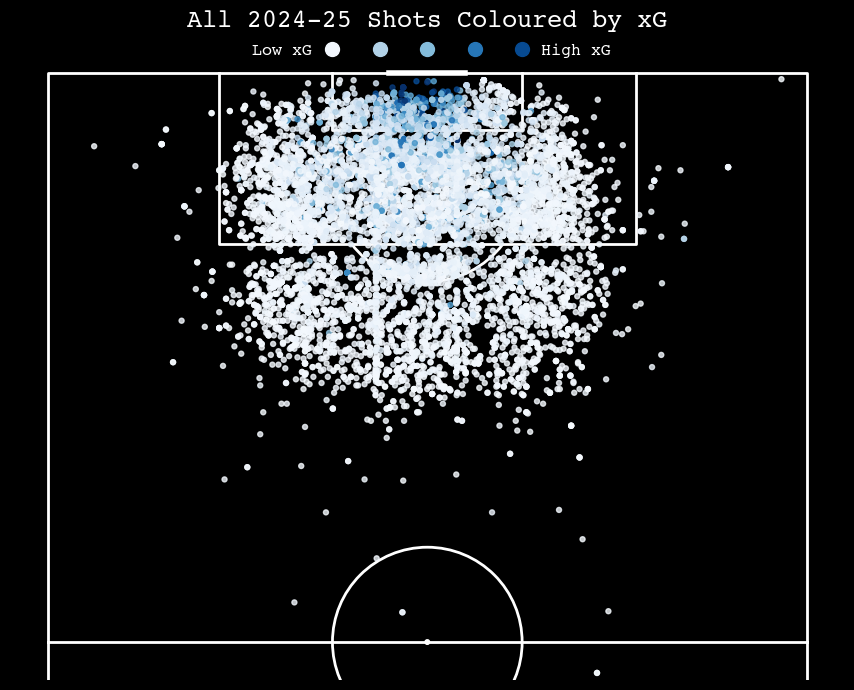

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch

# print(shots_large_data_2024['x'].min())
# print(shots_large_data_2024['y'].min())

shots_large_data_2024_rescaled = shots_large_data_2024.copy()
rescale_value = 8/7
shots_large_data_2024_rescaled['x_rescaled'] = shots_large_data_2024_rescaled['x']*rescale_value
shots_large_data_2024_rescaled['y_rescaled'] = shots_large_data_2024_rescaled['y']*rescale_value


pitch = VerticalPitch(line_color='white',pitch_color='black', half=True)
fig, ax = pitch.draw(figsize=(10, 7))
fig.patch.set_facecolor('black')
pitch.scatter(shots_large_data_2024_rescaled['x_rescaled'], shots_large_data_2024_rescaled['y_rescaled'], c=shots_large_data_2024['expectedGoals'], cmap='Blues', s=13, alpha=0.8, ax=ax)
pitch.scatter(122.5, 30, c='#f2f7fd', s=100, ax=ax)
pitch.scatter(122.5, 35, c='#b2d2e8', s=100, ax=ax)
pitch.scatter(122.5, 40, c='#84bcdb', s=100, ax=ax)
pitch.scatter(122.5, 45, c='#2676b7', s=100, ax=ax)
pitch.scatter(122.5, 50, c='#074a91', s=100, ax=ax)
pitch.text(121.9, 21.5, s='Low xG', fontdict={'family': 'Courier', 'weight': 'bold', 'size': 12, 'color':'white'}, ax=ax)
pitch.text(121.9, 52, s='High xG', fontdict={'family': 'Courier', 'weight': 'bold', 'size': 12, 'color':'white'}, ax=ax)




plt.title(
    'All 2024-25 Shots Coloured by xG',
    fontdict={'family': 'Courier', 'weight': 'bold', 'size': 18, 'color':'white'})
plt.savefig('allshotsplot_2.png', dpi=300)
plt.show()

In [12]:
# Building a model to predict the location on goal based on other factors
import statsmodels.api as sm
import numpy as np

all_shots_no_blocks = all_shots_rescaled[all_shots_rescaled['isBlocked'] == False]
all_shots_no_blocks_with_dummies = pd.get_dummies(all_shots_no_blocks, columns=['shotType', 'SCA 1_Event', 'situation', 'Unnamed: 8_level_0_Notes'], dtype=int)
all_shots_no_blocks_with_dummies.head()

,Unnamed: 0,id,playerName,eventType,teamId,playerId,x,y,min,period,...,situation_FromCorner,situation_IndividualPlay,situation_RegularPlay,situation_SetPiece,situation_ThrowInSetPiece,Unnamed: 8_level_0_Notes_Deflected,"Unnamed: 8_level_0_Notes_Deflected, Volley",Unnamed: 8_level_0_Notes_Free kick,"Unnamed: 8_level_0_Notes_Free kick, Deflected",Unnamed: 8_level_0_Notes_Volley
2,NaN,2709591459,Luis Diaz,Miss,8650,860914,87.211765,42.466250,48,SecondHalf,...,0,0,1,0,0,0,0,0,0,0
3,NaN,2709596929,Luis Diaz,Miss,8650,860914,100.637931,35.982500,55,SecondHalf,...,0,0,1,0,0,0,0,0,0,0
5,NaN,2713407797,Luis Diaz,Goal,8650,860914,91.600000,38.872619,13,FirstHalf,...,0,0,0,0,0,0,0,0,0,0
7,NaN,2713478823,Luis Diaz,AttemptSaved,8650,860914,92.200000,32.017500,64,SecondHalf,...,0,0,1,0,0,0,0,0,0,0
8,NaN,2716419067,Luis Diaz,Goal,8650,860914,100.827586,38.368333,35,FirstHalf,...,0,0,1,0,0,0,0,0,0,0


In [13]:
all_shots_no_blocks_on_target = all_shots_no_blocks[all_shots_no_blocks['isOnTarget'] == True]
print(all_shots_no_blocks_on_target['onGoalShot.y.rescaled'].max())
print(all_shots_no_blocks_on_target['onGoalShot.y.rescaled'].min())
difference = (all_shots_no_blocks_on_target['onGoalShot.y.rescaled'].max() - all_shots_no_blocks_on_target['onGoalShot.y.rescaled'].min())/2
print(2*difference+all_shots_no_blocks_on_target['onGoalShot.x.rescaled'].min())
print(0.623419657195767/2)

0.623419657195767
0.010192146984127
0.6853174573015852
0.3117098285978835


In [ ]:
conditions = [ 
    (all_shots_no_blocks['onGoalShot.x.rescaled'] < 0.684),
    
    (all_shots_no_blocks['onGoalShot.x.rescaled'] >= 0.684) & 
    (all_shots_no_blocks['onGoalShot.x.rescaled'] < 1.296),
    
    (all_shots_no_blocks['onGoalShot.x.rescaled'] >= 1.296) 
]

choices = ['Left', 'Middle', 'Right']

all_shots_no_blocks['goalxZone'] = np.select(conditions, choices, default='Missed')

conditionsy = [
    (all_shots_no_blocks['onGoalShot.y.rescaled'] > 0) & 
    (all_shots_no_blocks['onGoalShot.y.rescaled'] < 0.3117),
    
    (all_shots_no_blocks['onGoalShot.y.rescaled'] >= 0.3117)
]
choicesy = ['Bottom', 'Top']
all_shots_no_blocks['goalyZone'] = np.select(conditionsy, choicesy, default='Missed')
all_shots_no_blocks['goalZone'] = all_shots_no_blocks['goalxZone']+' '+all_shots_no_blocks['goalyZone']

all_shots_no_blocks.head()

/var/folders/r2/l3m1j7vd1djg8cftzv5dx7200000gn/T/ipykernel_89175/403729447.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_shots_no_blocks['goalxZone'] = np.select(conditions, choices, default='Missed')
/var/folders/r2/l3m1j7vd1djg8cftzv5dx7200000gn/T/ipykernel_89175/403729447.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_shots_no_blocks['goalyZone'] = np.select(conditionsy, choicesy, default='Missed')
/var/folders/r2/l3m1j7vd1djg8cftzv5dx7200000gn/T/ipykernel_89175/403729447.py:24: Sett

,Unnamed: 0,id,playerName,eventType,shotType,situation,teamId,playerId,x,y,...,Unnamed: 8_level_0_Notes,SCA 1_Player,SCA 1_Event,SCA 2_Player,SCA 2_Event,onGoalShot.x.rescaled,onGoalShot.y.rescaled,goalxZone,goalyZone,goalZone
2,NaN,2709591459,Luis Diaz,Miss,RightFoot,RegularPlay,8650,860914,87.211765,42.466250,...,NaN,Luis Díaz,Take-On,Dominik Szoboszlai,Pass (Live),6.700098,1.658858,Right,Top,Right Top
3,NaN,2709596929,Luis Diaz,Miss,RightFoot,RegularPlay,8650,860914,100.637931,35.982500,...,NaN,Trent Alexander-Arnold,Pass (Live),Diogo Jota,Pass (Live),2.099963,0.957708,Right,Top,Right Top
5,NaN,2713407797,Luis Diaz,Goal,LeftFoot,FastBreak,8650,860914,91.600000,38.872619,...,NaN,Diogo Jota,Pass (Live),NaN,NaN,0.495701,0.248009,Left,Bottom,Left Bottom
7,NaN,2713478823,Luis Diaz,AttemptSaved,RightFoot,RegularPlay,8650,860914,92.200000,32.017500,...,NaN,Mohamed Salah,Pass (Live),Mohamed Salah,Take-On,1.806878,0.064550,Right,Bottom,Right Bottom
8,NaN,2716419067,Luis Diaz,Goal,Header,RegularPlay,8650,860914,100.827586,38.368333,...,NaN,Mohamed Salah,Pass (Live),Ryan Gravenberch,Pass (Live),0.293981,0.409385,Left,Top,Left Top


In [15]:
all_shots_no_blocks_location_dummies = pd.get_dummies(all_shots_no_blocks, columns=['goalZone'], dtype=int)
all_shots_no_blocks_location_dummies['expectedGoalsOnTarget'] = all_shots_no_blocks_location_dummies['expectedGoalsOnTarget'].astype(float)
all_shots_no_blocks_location_dummies = all_shots_no_blocks_location_dummies[all_shots_no_blocks_location_dummies['expectedGoalsOnTarget'].notna()]

all_shots_no_blocks_location_dummies_on_target = all_shots_no_blocks_location_dummies[all_shots_no_blocks_location_dummies['isOnTarget'] == True]
X = all_shots_no_blocks_location_dummies[['x', 'y', 'goalZone_Left Bottom', 'goalZone_Left Top',
       'goalZone_Middle Bottom',
       'goalZone_Middle Top',
       'goalZone_Right Bottom', 'goalZone_Right Top']]
X = X.apply(pd.to_numeric, errors='coerce')
X = sm.add_constant(X)
y = all_shots_no_blocks_location_dummies['expectedGoalsOnTarget']
print(y.isna().sum())  # Should be 0


model = sm.OLS(y, X) 
results = model.fit()
predictions = results.predict(X)
all_shots_no_blocks_location_dummies['predicted_xGOTzone'] = predictions
all_shots_no_blocks_location_dummies.to_csv('all_shots_with_predicted_xgotzone_value.csv')
print(results.summary())

0
                              OLS Regression Results                             
Dep. Variable:     expectedGoalsOnTarget   R-squared:                       0.122
Model:                               OLS   Adj. R-squared:                  0.121
Method:                    Least Squares   F-statistic:                     125.9
Date:                   Sat, 26 Apr 2025   Prob (F-statistic):          6.20e-174
Time:                           14:50:09   Log-Likelihood:                 100.36
No. Observations:                   6340   AIC:                            -184.7
Df Residuals:                       6332   BIC:                            -130.7
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [16]:
all_shots_no_blocks_location_dummies_goals = pd.get_dummies(all_shots_no_blocks_location_dummies, columns=['eventType', 'shotType', 'SCA 1_Event'], dtype=int)

columns_to_drop = ['Unnamed: 0','eventType', 'id', 'playerName','situation', 'teamId',
       'playerId','min', 'period', 'isOwnGoal', 'isBlocked',
       'isSavedOffLine', 'isFromInsideBox', 'blockedX',
       'blockedY', 'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'box', 'homeTeamId', 'awayTeamId',
       'homeTeamName', 'awayTeamName', 'homeScore', 'awayScore', 'matchId',
       'matchDate', 'teamColor', 'teamColorDark', 'onGoalShot.x',
       'onGoalShot.y', 'onGoalShot.zoomRatio', 'minAdded', '', 'min1',
       'Unnamed: 2_level_0_Squad', 'Unnamed: 5_level_0_Outcome',
       'Unnamed: 6_level_0_Distance', 'Unnamed: 7_level_0_Body Part',
       'Unnamed: 8_level_0_Notes', 'SCA 1_Player', 'SCA 1_Event',
       'SCA 2_Player', 'SCA 2_Event', 'onGoalShot.x.rescaled',
       'onGoalShot.y.rescaled', 'goalxZone', 'goalyZone',
       'predicted_xGOTzone', 'eventType_AttemptSaved',
       'eventType_Miss', 'eventType_Post']

columns_to_drop = [col for col in columns_to_drop if col in all_shots_no_blocks_location_dummies_goals.columns]
all_shots_no_blocks_location_dummies_logit = all_shots_no_blocks_location_dummies_goals.drop(columns=columns_to_drop)
print(len(all_shots_no_blocks_location_dummies_logit))
all_shots_no_blocks_location_dummies_logit.columns

6340


Index(['x', 'y', 'isOnTarget', 'goalZone_Left Bottom', 'goalZone_Left Top',
       'goalZone_Middle Bottom', 'goalZone_Middle Top',
       'goalZone_Right Bottom', 'goalZone_Right Top', 'eventType_Goal',
       'shotType_Header', 'shotType_LeftFoot', 'shotType_OtherBodyParts',
       'shotType_RightFoot', 'SCA 1_Event_Fouled', 'SCA 1_Event_Interception',
       'SCA 1_Event_Pass (Dead)', 'SCA 1_Event_Pass (Live)',
       'SCA 1_Event_Shot', 'SCA 1_Event_Tackle', 'SCA 1_Event_Take-On'],
      dtype='object')

In [18]:
x_jpsxg = all_shots_no_blocks_location_dummies_logit.drop(['eventType_Goal'], axis=1)
y_jpsxg = all_shots_no_blocks_location_dummies_logit['eventType_Goal']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(x_jpsxg, y_jpsxg, test_size=0.2, random_state=42)
middled_model = LogisticRegression(max_iter=10000)
middled_model.fit(X_train, y_train)

y_pred_proba = middled_model.predict_proba(x_jpsxg)[:,1]
y_pred_proba[:10]

all_shots_no_blocks_location_dummies_goals['jpsxg'] = y_pred_proba
all_shots_no_blocks_location_dummies_goals['jpsxg - psxg'] = all_shots_no_blocks_location_dummies_goals['jpsxg'] - all_shots_no_blocks_location_dummies_goals['expectedGoalsOnTarget']
all_shots_no_blocks_location_dummies_goals.to_csv('data_with_jpsxg.csv')

#### Figure two shows a picture of a goal overlaid with shots taken in the current Premier League season coloured by their post-shot expected goals value (PSxG, sometimes referred to as expected goals on target). PSxG acts to evaluate the probability of the shot going in based on the position it crosses the goalline, the angle and distance the shot is taken from and particularly the speed of the shot, hence explaining much of the variation that can be observed in figure 2. A very simple way of creating a measure of shot quality therefore is how much does a player improve their chance of scoring from the point where they are about to shoot to after they have taken the shot.

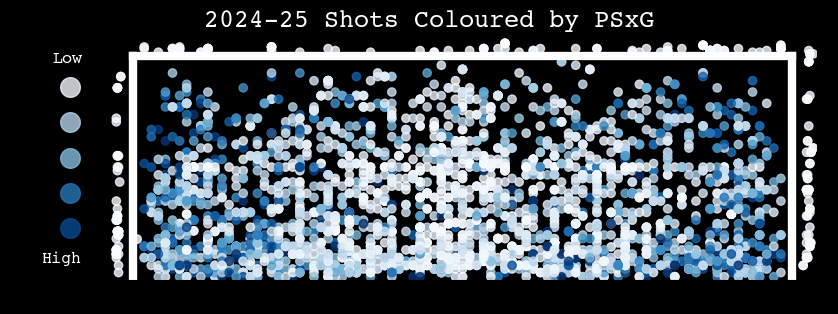

In [21]:
psxg_df = all_shots_no_blocks.copy()
psxg_df = psxg_df[psxg_df['onGoalShot.x.rescaled'] > 0.01]
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(psxg_df['onGoalShot.x.rescaled'], psxg_df['onGoalShot.y.rescaled'], c=psxg_df['expectedGoalsOnTarget'], cmap='Blues', alpha=0.8)
linecolour = 'white'
ax.set_facecolor('black')
fig.patch.set_facecolor('black')
ax.plot([0.06,0.06], [0, 0.64], color=linecolour, linewidth=6)
ax.plot([1.94,1.94], [0, 0.64], color=linecolour, linewidth=6)
ax.plot([0.06,1.94], [0.64, 0.64], color=linecolour, linewidth=6)
ax.scatter(-0.12, 0.55, c='#f2f7fd', s=200, alpha=0.8)
ax.scatter(-0.12, 0.45, c='#b2d2e8', s=200, alpha=0.8)
ax.scatter(-0.12, 0.35, c='#84bcdb', s=200, alpha=0.8)
ax.scatter(-0.12, 0.25, c='#2676b7', s=200, alpha=0.8)
ax.scatter(-0.12, 0.15, c='#074a91', s=200, alpha=0.8)
ax.text(-0.17, 0.62, s='Low', fontdict={'family': 'Courier', 'weight': 'bold', 'size': 12, 'color':'white'})
ax.text(-0.2, 0.05, s='High', fontdict={'family': 'Courier', 'weight': 'bold', 'size': 12, 'color':'white'})



plt.title(
    '2024-25 Shots Coloured by PSxG',
    fontdict={'family': 'Courier', 'weight': 'bold', 'size': 18, 'color':'white'})

ax.set_aspect('equal')
ax.set_xlim(-0.2, 2.01)
ax.set_ylim(0, 0.7)
plt.savefig('psxg_2.png', dpi=300)
plt.show()